In [2]:
import tensorflow as tf
import tensorflow.keras as keras

# set seed
tf.random.set_seed(1234)

# data preparation
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape((50000, 32, 32, 3))
x_test  = x_test.reshape((10000, 32, 32, 3))

# normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# model
model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(32, 32, 3)))

model.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation = 'relu'))
model.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation = 'relu'))
model.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

# training
opt = tf.keras.optimizers.Adam(0.00001)
model.compile(optimizer=opt, metrics=['accuracy'], 
              loss='sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, batch_size=256, 
                    validation_data=(x_test, y_test), epochs=100, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 128)       147584    
                                                      

196/196 [==============================] - 8s 40ms/step - loss: 0.6089 - accuracy: 0.7893 - val_loss: 1.0314 - val_accuracy: 0.6592
Epoch 92/100
196/196 [==============================] - 8s 40ms/step - loss: 0.5922 - accuracy: 0.7967 - val_loss: 0.9917 - val_accuracy: 0.6656
Epoch 93/100
196/196 [==============================] - 8s 40ms/step - loss: 0.5851 - accuracy: 0.7996 - val_loss: 0.9927 - val_accuracy: 0.6661
Epoch 94/100
196/196 [==============================] - 8s 40ms/step - loss: 0.5736 - accuracy: 0.8041 - val_loss: 1.0382 - val_accuracy: 0.6592
Epoch 95/100
196/196 [==============================] - 8s 40ms/step - loss: 0.5667 - accuracy: 0.8074 - val_loss: 0.9987 - val_accuracy: 0.6666
Epoch 96/100
196/196 [==============================] - 8s 40ms/step - loss: 0.5532 - accuracy: 0.8121 - val_loss: 1.0127 - val_accuracy: 0.6672
Epoch 97/100
196/196 [==============================] - 8s 40ms/step - loss: 0.5480 - accuracy: 0.8129 - val_loss: 1.0071 - val_accuracy: 0.672

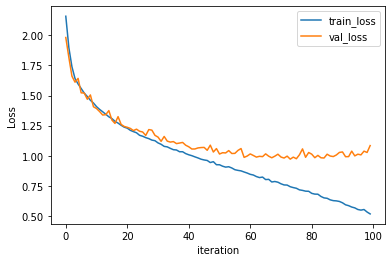

In [3]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = "train_loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

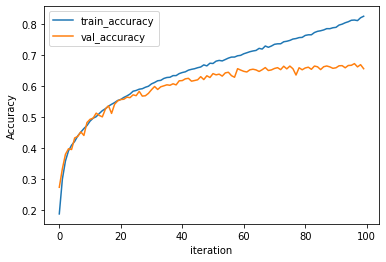

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = "train_accuracy")
plt.plot(history.history['val_accuracy'], label = "val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()